In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_excel('datasethumanattribution.xlsx')

In [ ]:
df.head()

,Unnamed: 0,folder,filename,claim,label,url,GOLD EXPLANATION,CATEGORY,gemini_label,gemini_explanation,gpt4_label,gpt4_rationale
0,0,/content/drive/MyDrive/images/myths on urticaria,mythsonurticaria1.jpeg,Eating chocolate will cause acne.,SUPPORTED,https://www.jaad.org/article/S0190-9622(16)013...,The chocolate consumption group had a statisti...,Skin,REFUTED,There is no scientific evidence to support the...,REFUTED,A study published in the Journal of the Americ...
1,1,/content/drive/MyDrive/images/myths on urticaria,mythsonurticaria1.jpeg,You can get a cold from being in the rain.,SUPPORTED,https://pubmed.ncbi.nlm.nih.gov/17705968/,Exposure to cold has often been associated wi...,General Health,REFUTED,"The common cold is caused by viruses, not by b...",REFUTED,Colds are caused by viruses not by exposure t...
2,2,/content/drive/MyDrive/images/myths on urticaria,mythsonurticaria1.jpeg,Stress can cause acne.,SUPPORTED,https://medicaljournalssweden.se/actadv/articl...,"Based on this study, increased stress does not...",Skin,SUPPORTED,There is evidence to suggest that stress can t...,SUPPORTED,Multiple scientific studies have established a...
3,3,/content/drive/MyDrive/images/myths on urticaria,mythsonurticaria1.jpeg,You can prevent acne by washing your face more...,NOT ENOUGH INFORMATION,https://www.tandfonline.com/doi/full/10.1080/0...,Washing and over-the-counter cleansers are com...,Skin,REFUTED,Washing your face more often does not prevent ...,REFUTED,Although washing your face can help remove exc...
4,4,/content/drive/MyDrive/images/myths on vascula...,mythsonvascularsurgery3.jpeg,Varicose veins are caused by standing too much.,SUPPORTED,https://www.sjweh.fi/article/562,"For men working mostly in a standing position,...",Vascular,NOT ENOUGH INFORMATION,While standing for long periods of time can co...,SUPPORTED,Varicose veins can indeed be caused by prolong...


## Manual Annotated Label Distribution in the Dataset

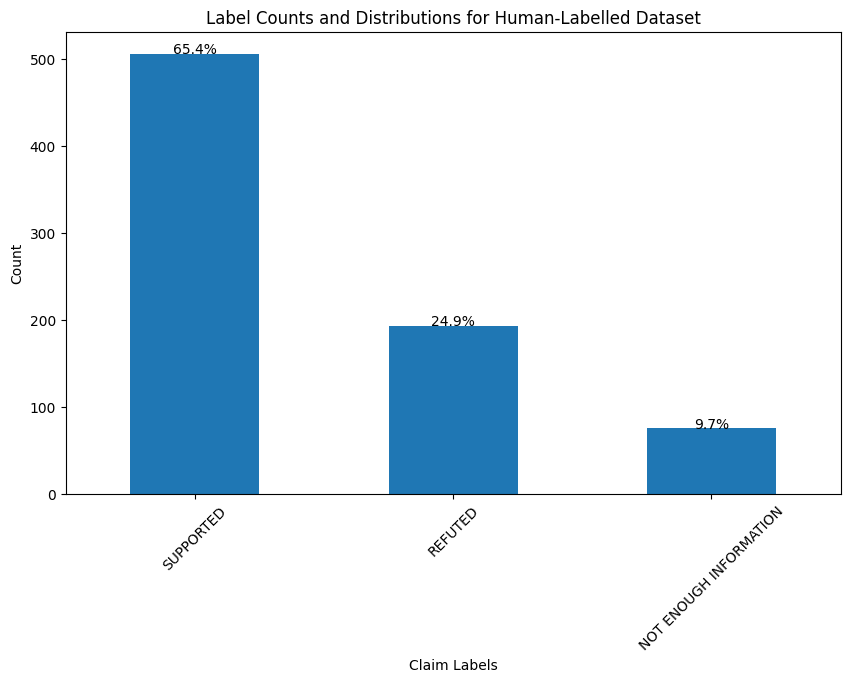

In [ ]:
import matplotlib.pyplot as plt

# Filter the dataframe
df = df[df['label'] != '']

# Get the count of each label
label_counts = df['label'].value_counts()

# Calculate percentage proportions
total_count = label_counts.sum()
label_percentages = (label_counts / total_count) * 100

# Plotting
plt.figure(figsize=(10, 6))
bars = label_counts.plot(kind='bar')  # Change color here

# Add percentage on top of each bar
for i, (count, percentage) in enumerate(zip(label_counts, label_percentages)):
    plt.text(i, count + 0.5, f'{percentage:.1f}%', ha='center')

# Set title and labels
plt.title('Label Counts and Distributions for Human-Labelled Dataset')
plt.xlabel('Claim Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()


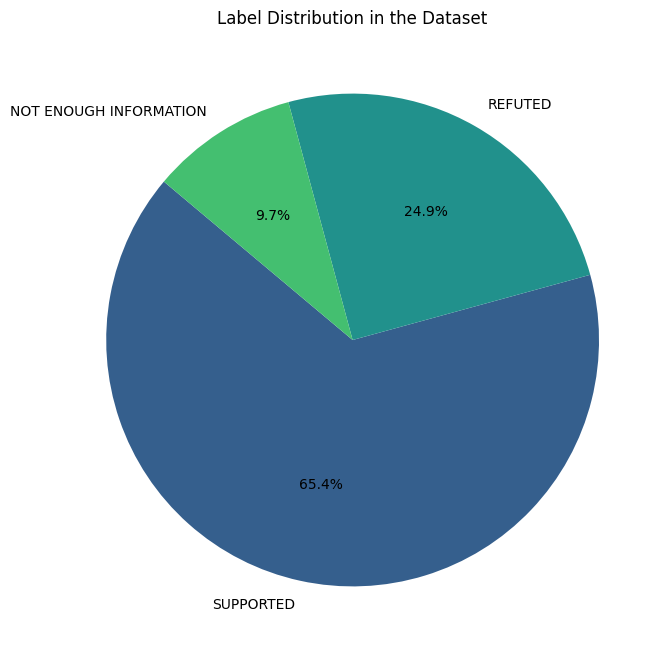

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.viridis(np.linspace(0.3, 0.7, len(label_counts))))
plt.title('Label Distribution in the Dataset')
plt.show()


## Category Distribution in the Dataset

CATEGORY
General Health           159
Skin                      97
Women' s Health           70
Blood                     59
Neurological health       56
Bone health               43
Ear                       39
Cardiovascular Health     35
Men's health              32
Throat                    31
Name: count, dtype: int64


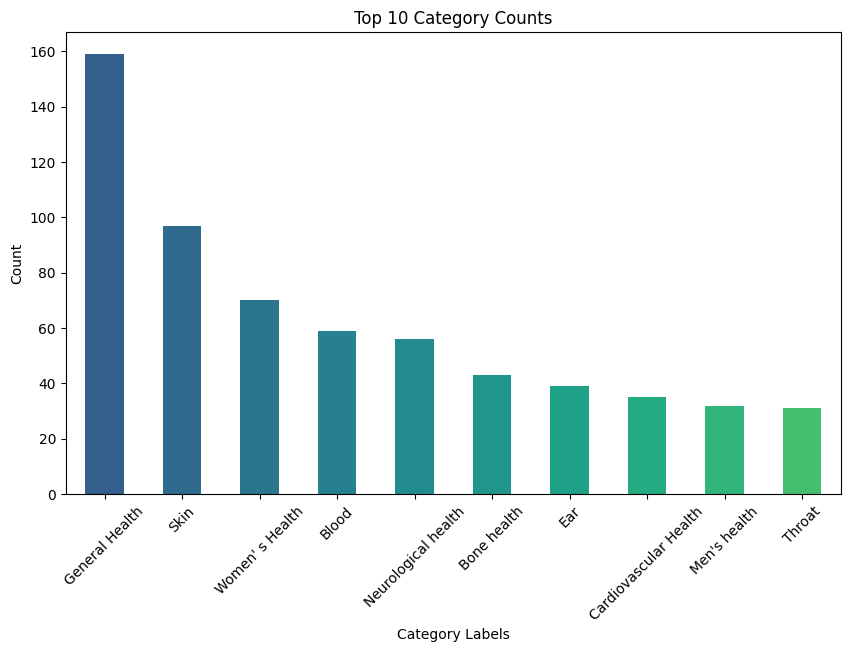

In [ ]:
df = df[df['CATEGORY'] != '']

category_counts = df['CATEGORY'].value_counts().head(10)
print(category_counts)
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color=plt.cm.viridis(np.linspace(0.3, 0.7, len(category_counts))))
plt.title('Top 10 Category Counts')
plt.xlabel('Category Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
print(df['CATEGORY'].value_counts())

CATEGORY
General Health             159
Skin                        97
Women' s Health             70
Blood                       59
Neurological health         56
Bone health                 43
Ear                         39
Cardiovascular Health       35
Men's health                32
Throat                      31
Dental Health               23
Fitness                     19
COVID                       19
Diabetes                    18
Hair                        17
Eye                         13
Vascular                    11
Cancer                      10
Muscles                     10
Mental Health                9
COVID-19                     2
Kidney                       1
Gastrointestinal Health      1
Name: count, dtype: int64


label                    NOT ENOUGH INFORMATION  REFUTED  SUPPORTED
CATEGORY                                                           
Blood                                         2       19         38
Bone health                                   7        8         28
COVID                                         2        9         10
Cancer                                        0        0         10
Cardiovascular Health                         1        7         27
Dental Health                                 5        3         15
Diabetes                                      0        7         11
Ear                                           4        7         28
Eye                                           3        3          7
Fitness                                       1        4         14
Gastrointestinal Health                       0        1          0
General Health                               11       40        108
Hair                                          1 

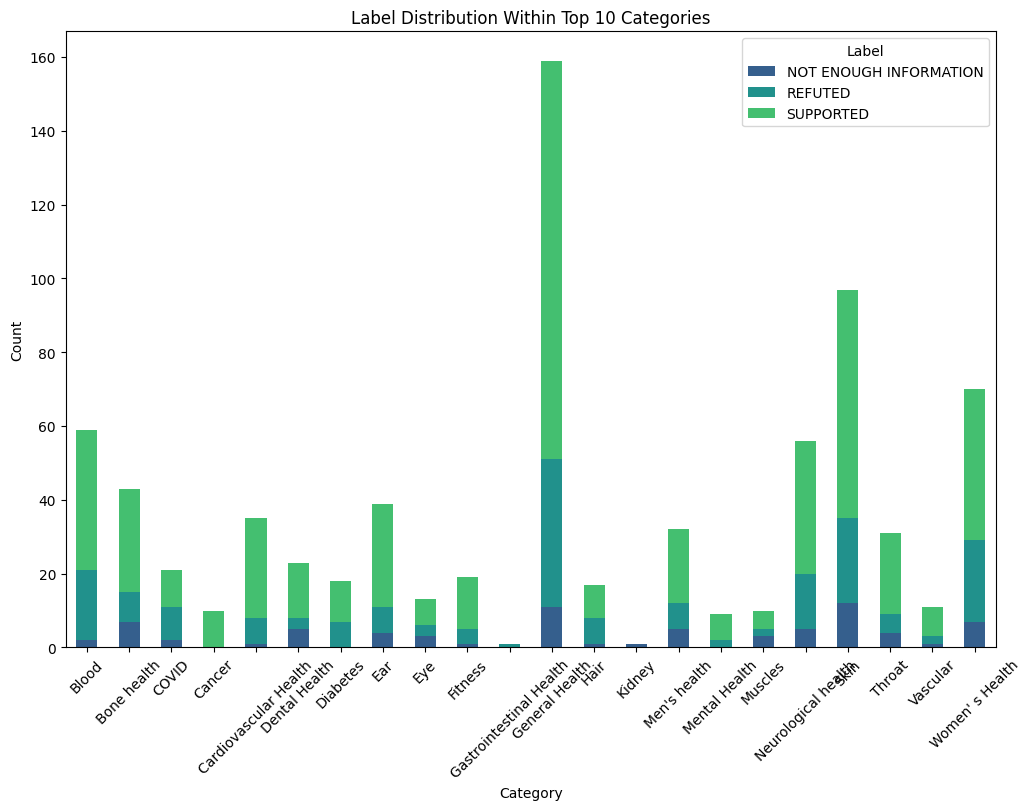

In [ ]:
top_categories = df['CATEGORY'].value_counts().index

df_top_categories = df[df['CATEGORY'].isin(top_categories)]

category_label_distribution_top = pd.crosstab(df_top_categories['CATEGORY'], df_top_categories['label'])
print(category_label_distribution_top)
category_label_distribution_top.plot(kind='bar', stacked=True, figsize=(12, 8), color=plt.cm.viridis(np.linspace(0.3, 0.7, category_label_distribution_top.shape[1])))
plt.title('Label Distribution Within Top 10 Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Label')
plt.show()

## Gemini Annotated Label Distribution

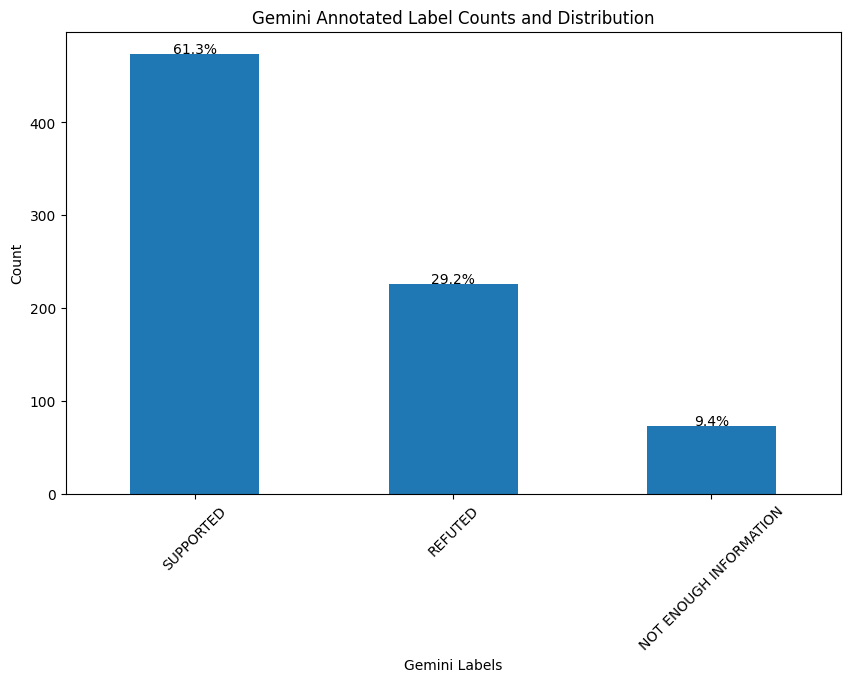

In [ ]:
import matplotlib.pyplot as plt

# Filter the dataframe
df = df[df['gemini_label'] != '']

# Get the count of each Gemini label
gem_label_counts = df['gemini_label'].value_counts()

# Calculate percentage proportions
total_count = gem_label_counts.sum()
gem_label_percentages = (gem_label_counts / total_count) * 100

# Plotting
plt.figure(figsize=(10, 6))
bars = gem_label_counts.plot(kind='bar')  # Change color here

# Add percentage on top of each bar
for i, (count, percentage) in enumerate(zip(gem_label_counts, gem_label_percentages)):
    plt.text(i, count + 0.5, f'{percentage:.1f}%', ha='center')

# Set title and labels
plt.title('Gemini Annotated Label Counts and Distribution')
plt.xlabel('Gemini Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()


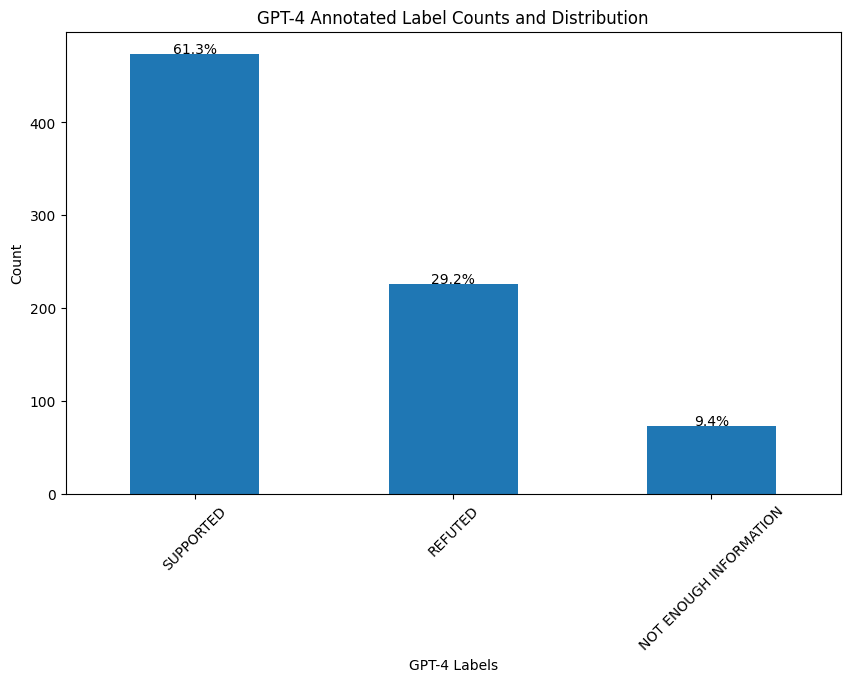

In [ ]:
import matplotlib.pyplot as plt

# Filter the dataframe
df = df[df['gpt4_label'] != '']

# Get the count of each Gemini label
gem_label_counts = df['gemini_label'].value_counts()

# Calculate percentage proportions
total_count = gem_label_counts.sum()
gem_label_percentages = (gem_label_counts / total_count) * 100

# Plotting
plt.figure(figsize=(10, 6))
bars = gem_label_counts.plot(kind='bar')  # Change color here

# Add percentage on top of each bar
for i, (count, percentage) in enumerate(zip(gem_label_counts, gem_label_percentages)):
    plt.text(i, count + 0.5, f'{percentage:.1f}%', ha='center')

# Set title and labels
plt.title('GPT-4 Annotated Label Counts and Distribution')
plt.xlabel('GPT-4 Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import pandas as pd

# Ensure you've downloaded the necessary NLTK resources in your environment
nltk.download('punkt')
nltk.download('stopwords')

# Assuming df is your DataFrame and it has a column 'claim' with text data
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['is_string'] = df['claim'].apply(lambda x: isinstance(x, str))

In [ ]:
# Tokenize and remove stopwords for entries that are strings
df_filtered = df[df['is_string'] == True]
df['filtered_tokens'] = df_filtered['claim'].apply(lambda claim: [word.lower() for word in word_tokenize(claim) if word.isalpha() and word.lower() not in stop_words])


In [ ]:
df['filtered_tokens']

0                       [eating, chocolate, cause, acne]
1                                      [get, cold, rain]
2                                  [stress, cause, acne]
3                  [prevent, acne, washing, face, often]
4              [varicose, veins, caused, standing, much]
                             ...                        
769    [vt, characterized, heart, rate, beats, per, m...
770    [vt, caused, variety, factors, including, hear...
771             [tighten, skin, dermabrasion, treatment]
772    [subdural, epidural, hematomas, abnormal, coll...
773    [positive, hydrogen, ions, accumulating, muscl...
Name: filtered_tokens, Length: 774, dtype: object

In [ ]:
all_tokens = []
for sublist in df['filtered_tokens']:
    if isinstance(sublist, list):  # Ensure sublist is indeed a list
        all_tokens.extend(sublist)

token_counts = Counter(all_tokens)

# Extract the top 10 tokens
top_20_tokens = token_counts.most_common(20)



In [ ]:
token_counts_dict = dict(top_20_tokens)

In [ ]:
token_counts_dict

{'blood': 68,
 'disease': 60,
 'thyroid': 45,
 'skin': 37,
 'cause': 36,
 'heart': 35,
 'cancer': 35,
 'helps': 35,
 'sign': 31,
 'common': 30,
 'help': 30,
 'cells': 30,
 'get': 29,
 'caused': 29,
 'high': 29,
 'pain': 28,
 'treated': 27,
 'people': 27,
 'prostate': 27,
 'medication': 26}

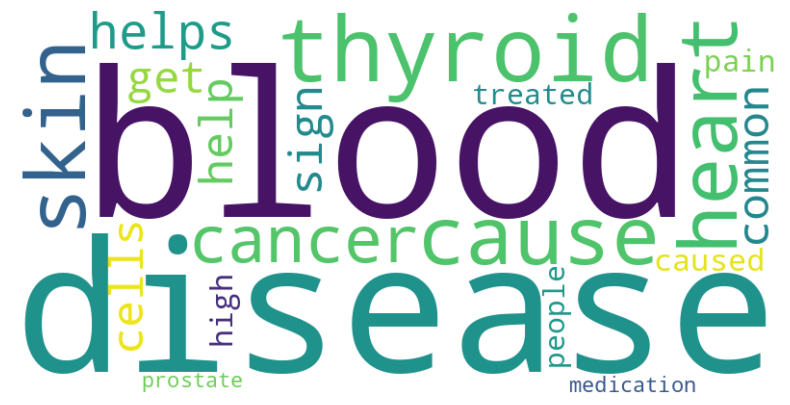

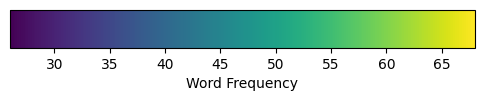

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Generating a word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(token_counts_dict)

# Displaying the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Extracting just the frequencies from the token_counts_dict for use in the color scale
frequencies_from_dict = np.array(list(token_counts_dict.values()))

# Generating a color scale figure with frequencies from the dict
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

# Using a colormap
cmap = plt.cm.viridis
norm = plt.Normalize(vmin=frequencies_from_dict.min(), vmax=frequencies_from_dict.max())



plt.show()